# CanESM5 GMD paper Figure 20
## Maps of mean sea-ice extent


### history
- SJH, first look 2019-04-08

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy
from pprint import pprint
import matplotlib.path as mpath
import sys
import os
import cmocean
import modules.basic_stats as bst
import sqlite3
from cdo import Cdo
import modules.plotting_module as pltm

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
%store -r start 
%store -r end
%store -r siconc_limit

In [4]:
#remapping

runCDO = False

if runCDO:
    CanESM5_siconc = 'siconc_SImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/SImon/siconc/gn/v20190429/', CanESM5_siconc)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_siconc
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    CanESM2_siconc = 'sic_OImon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'
    ifile = os.path.join('input_data/CanESM2_large_ensemble/historical-r1/mon/seaIce/sic/r1i1p1/', CanESM2_siconc)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_siconc
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    NSIDC_nh_siconc = 'seaice_conc_monthly_nh_1981-2010_v03r01.nc'
    ifile = os.path.join('input_data/processed_data/', NSIDC_nh_siconc)
    ofile = 'input_data/processed_data/remap-woa09_' + NSIDC_nh_siconc
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    NSIDC_sh_siconc = 'seaice_conc_monthly_sh_1981-2010_v03r01.nc'
    ifile = os.path.join('input_data/processed_data/', NSIDC_sh_siconc)
    ofile = 'input_data/processed_data/remap-woa09_' + NSIDC_sh_siconc
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)


In [5]:
#Load data (overall time slice 1981-2010 inclusive)
siconc_CanESM5  = xr.open_dataset('input_data/processed_data/remap-woa09_siconc_SImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['siconc'].sel(time=slice(start, end))
siconc_CanESM2  = xr.open_dataset('input_data/processed_data/remap-woa09_sic_OImon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['sic'].sel(time=slice(start, end))

#NSIDC data is fractional - convert to percent to compare with CanESM5
siconc_NSIDC_sh = xr.open_dataset('input_data/processed_data/remap-woa09_seaice_conc_monthly_sh_1981-2010_v03r01.nc')['goddard_merged_seaice_conc_monthly'].sel(time=slice(start, end))*100
siconc_NSIDC_nh = xr.open_dataset('input_data/processed_data/remap-woa09_seaice_conc_monthly_nh_1981-2010_v03r01.nc')['goddard_merged_seaice_conc_monthly'].sel(time=slice(start, end))*100

In [6]:
#get select month of interest over all years (mar or sept), and get mean of selected data

#CanESM5
CanESM5_selyears_march = siconc_CanESM5.sel(time=siconc_CanESM5['time.month']==3)
CanESM5_selyears_march_mean = CanESM5_selyears_march.mean(dim='time')

CanESM5_selyears_sept  = siconc_CanESM5.sel(time=siconc_CanESM5['time.month']==9)
CanESM5_selyears_sept_mean  = CanESM5_selyears_sept.mean(dim='time')

#CanESM2
CanESM2_selyears_march = siconc_CanESM2.sel(time=siconc_CanESM2['time.month']==3)
CanESM2_selyears_march_mean = CanESM2_selyears_march.mean(dim='time')

CanESM2_selyears_sept  = siconc_CanESM2.sel(time=siconc_CanESM2['time.month']==9)
CanESM2_selyears_sept_mean  = CanESM2_selyears_sept.mean(dim='time')

#NSIDC southern hemisphere
NSIDC_selyears_march_sh = siconc_NSIDC_sh.sel(time=siconc_NSIDC_sh['time.month']==3)
NSIDC_selyears_march_mean_sh = NSIDC_selyears_march_sh.mean(dim='time')

NSIDC_selyears_sept_sh  = siconc_NSIDC_sh.sel(time=siconc_NSIDC_sh['time.month']==9)
NSIDC_selyears_sept_mean_sh  = NSIDC_selyears_sept_sh.mean(dim='time')

#NSIDC northern hemisphere
NSIDC_selyears_march_nh = siconc_NSIDC_nh.sel(time=siconc_NSIDC_nh['time.month']==3)
NSIDC_selyears_march_mean_nh = NSIDC_selyears_march_nh.mean(dim='time')

NSIDC_selyears_sept_nh  = siconc_NSIDC_nh.sel(time=siconc_NSIDC_nh['time.month']==9)
NSIDC_selyears_sept_mean_nh  = NSIDC_selyears_sept_nh.mean(dim='time')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean 

In [7]:
#anomalies

march_anomalies_sh = CanESM5_selyears_march_mean - NSIDC_selyears_march_mean_sh
sept_anomalies_sh  = CanESM5_selyears_sept_mean - NSIDC_selyears_sept_mean_sh
march_anomalies_nh = CanESM5_selyears_march_mean - NSIDC_selyears_march_mean_nh
sept_anomalies_nh  = CanESM5_selyears_sept_mean - NSIDC_selyears_sept_mean_nh

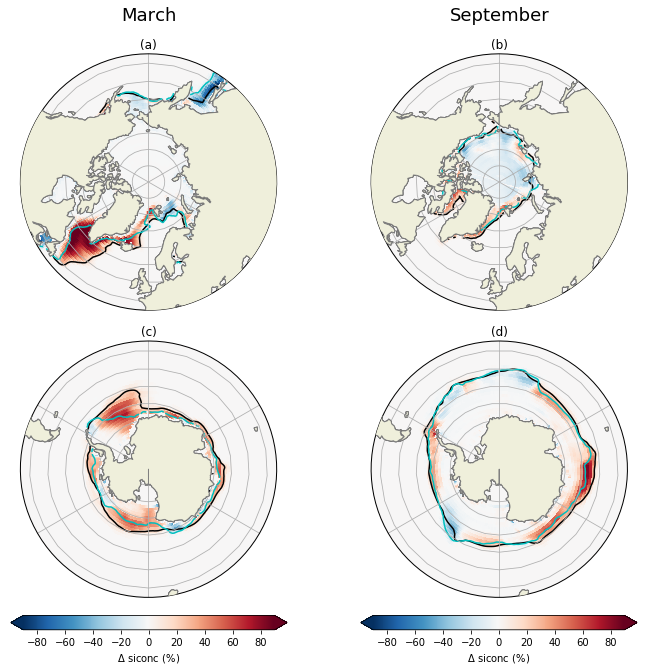

In [8]:
#plotting v1 (NSIDC-CanESM5 anomalies with CanESM5 contours)
vmin = -90
vmax = 90
title_fontsize = 18
cmap = plt.cm.RdBu_r
Ncontours = [siconc_limit]
color_contours = 'k'
color_contours_o = 'c'

fig = plt.figure(figsize=(12,10))

#set NaN color equal to 0 color to avoid boundaries between no data and zeros
rgba = cmap(0.5)
cmap.set_bad(color=rgba)

# Compute a circle in axes coordinates, which we can use as a boundary (from cartopy example gallery)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)


axnm = plt.subplot(2,2,1,projection=ccrs.NorthPolarStereo())
axnm.set_title('(a)')
axnm.text(0.5, 1.15, 'March', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axnm.transAxes)
imnm = axnm.pcolormesh(march_anomalies_nh.lon,march_anomalies_nh.lat,march_anomalies_nh,cmap=cmap,vmin=vmin, vmax=vmax, 
                       transform=ccrs.PlateCarree(), rasterized=True)
cnnm = axnm.contour(CanESM5_selyears_march_mean.lon, CanESM5_selyears_march_mean.lat, CanESM5_selyears_march_mean, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cnnm_o = axnm.contour(NSIDC_selyears_march_mean_nh.lon, NSIDC_selyears_march_mean_nh.lat, NSIDC_selyears_march_mean_nh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours_o)

axns = plt.subplot(2,2,2,projection=ccrs.NorthPolarStereo())
axns.set_title('(b)')
axns.text(0.5, 1.15, 'September', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axns.transAxes)
imns = axns.pcolormesh(sept_anomalies_nh.lon,sept_anomalies_nh.lat,sept_anomalies_nh,cmap=cmap, vmin=vmin, vmax=vmax, 
                       transform=ccrs.PlateCarree(), rasterized=True)
cnns = axns.contour(CanESM5_selyears_sept_mean.lon, CanESM5_selyears_sept_mean.lat, CanESM5_selyears_sept_mean, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cnns_o = axns.contour(NSIDC_selyears_sept_mean_nh.lon, NSIDC_selyears_sept_mean_nh.lat, NSIDC_selyears_sept_mean_nh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours_o)


axsm = plt.subplot(2,2,3,projection=ccrs.SouthPolarStereo())
axsm.set_title('(c)')
imsm = axsm.pcolormesh(march_anomalies_sh.lon,march_anomalies_sh.lat,march_anomalies_sh,cmap=cmap, vmin=vmin, vmax=vmax,
                       transform=ccrs.PlateCarree(), rasterized=True)
cnsm = axsm.contour(CanESM5_selyears_march_mean.lon, CanESM5_selyears_march_mean.lat, CanESM5_selyears_march_mean, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cnsm_o = axsm.contour(NSIDC_selyears_march_mean_sh.lon, NSIDC_selyears_march_mean_sh.lat, NSIDC_selyears_march_mean_sh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours_o)
cbaxes = fig.add_axes([0.15, 0.08, 0.32, 0.02]) 
cb = plt.colorbar(imsm,cax=cbaxes,orientation='horizontal',label=r'$\Delta$ siconc (%)',extend='both')

axss = plt.subplot(2,2,4,projection=ccrs.SouthPolarStereo())
axss.set_title('(d)')
imss = axss.pcolormesh(sept_anomalies_sh.lon,sept_anomalies_sh.lat,sept_anomalies_sh,cmap=cmap, vmin=vmin, vmax=vmax, 
                       transform=ccrs.PlateCarree(), rasterized=True)
cnss = axss.contour(CanESM5_selyears_sept_mean.lon, CanESM5_selyears_sept_mean.lat, CanESM5_selyears_sept_mean, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cnss_o = axss.contour(NSIDC_selyears_sept_mean_sh.lon, NSIDC_selyears_sept_mean_sh.lat, NSIDC_selyears_sept_mean_sh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours_o)
cbaxes = fig.add_axes([0.555, 0.08, 0.32, 0.02]) 
cb = plt.colorbar(imss,cax=cbaxes,orientation='horizontal',label=r'$\Delta$ siconc (%)',extend='both')


for ax,im,cn,cn_o in zip([axnm, axns],[imnm,imns],[cnnm,cnns],[cnnm_o,cnns_o]):
    for c in cn_o.collections:
        c.set_clip_path(circle, transform=ax.transAxes) 
    for c in cn.collections:
        c.set_clip_path(circle, transform=ax.transAxes) 
    im.set_clip_path(circle, transform=ax.transAxes)
    #plt.colorbar(im,ax=ax,label='siconc anomalies CanESM5-NSIDC observations (%)')   
    ax.set_extent([-180, 180, 90, 45],ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='grey')

    
for ax,im,cn,cn_o in zip([axsm, axss],[imsm,imss],[cnsm,cnss],[cnsm_o,cnss_o]):
    for c in cn_o.collections:
        c.set_clip_path(circle, transform=ax.transAxes)
    for c in cn.collections:
        c.set_clip_path(circle, transform=ax.transAxes) 
    im.set_clip_path(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -45],ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='grey')
    

plt.subplots_adjust(wspace=0.1, hspace=0.12)  

plt.savefig('plots/fig-20_seaice_extent-maps-v1.png', bbox_inches='tight')
plt.savefig('plots/fig-20_seaice_extent-maps-v1.pdf', bbox_inches='tight')

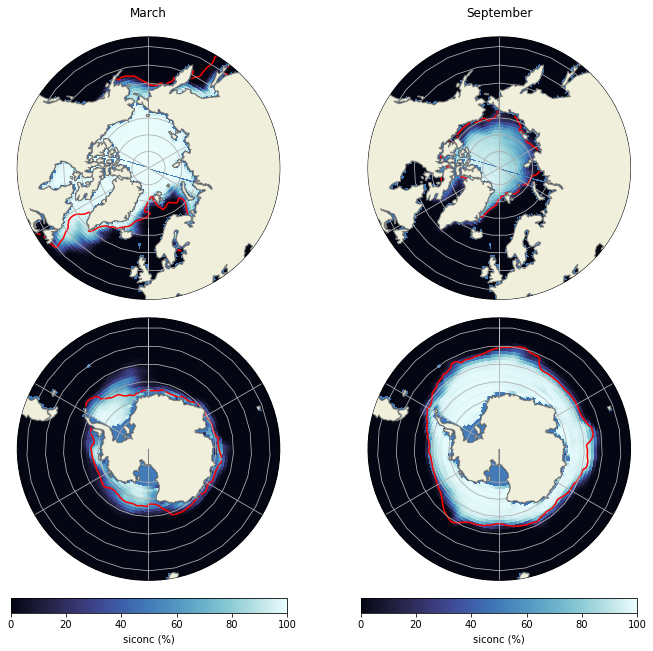

In [9]:
#plotting v2 (CanESM5 siconc with 15% limit from NSIDC overlaid)

vmin = 0
vmax = 100
title_pad = 20
Ncontours = [15]
color_contours = 'r'

fig = plt.figure(figsize=(12,10))

#set NaN color equal to 0 color to avoid boundaries between no data and zeros
cmap = cmocean.cm.ice#plt.cm.RdBu_r
rgba = cmap(0.5)
cmap.set_bad(color=rgba)

# Compute a circle in axes coordinates, which we can use as a boundary (from cartopy example gallery)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)


axnm = plt.subplot(2,2,1,projection=ccrs.NorthPolarStereo())
axnm.set_title('March',pad=title_pad)
imnm = axnm.pcolormesh(CanESM5_selyears_march_mean.lon, CanESM5_selyears_march_mean.lat, CanESM5_selyears_march_mean, 
                       cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
cnnm = axnm.contour(NSIDC_selyears_march_mean_nh.lon, NSIDC_selyears_march_mean_nh.lat, NSIDC_selyears_march_mean_nh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)

axns = plt.subplot(2,2,2,projection=ccrs.NorthPolarStereo())
axns.set_title('September',pad=title_pad)
imns = axns.pcolormesh(CanESM5_selyears_sept_mean.lon, CanESM5_selyears_sept_mean.lat, CanESM5_selyears_sept_mean, 
                       cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
cnns = axns.contour(NSIDC_selyears_sept_mean_nh.lon, NSIDC_selyears_sept_mean_nh.lat, NSIDC_selyears_sept_mean_nh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)

axsm = plt.subplot(2,2,3,projection=ccrs.SouthPolarStereo())
imsm = axsm.pcolormesh(CanESM5_selyears_march_mean.lon, CanESM5_selyears_march_mean.lat, CanESM5_selyears_march_mean, 
                       cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
cnsm = axsm.contour(NSIDC_selyears_march_mean_sh.lon, NSIDC_selyears_march_mean_sh.lat, NSIDC_selyears_march_mean_sh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cbaxes = fig.add_axes([0.15, 0.08, 0.32, 0.02]) 
cb = plt.colorbar(imsm,cax=cbaxes,orientation='horizontal',label='siconc (%)')

axss = plt.subplot(2,2,4,projection=ccrs.SouthPolarStereo())
imss = axss.pcolormesh(CanESM5_selyears_sept_mean.lon, CanESM5_selyears_sept_mean.lat, CanESM5_selyears_sept_mean, 
                       cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
cnss = axss.contour(NSIDC_selyears_sept_mean_sh.lon, NSIDC_selyears_sept_mean_sh.lat, NSIDC_selyears_sept_mean_sh, Ncontours, 
                   transform=ccrs.PlateCarree(), colors=color_contours)
cbaxes = fig.add_axes([0.555, 0.08, 0.32, 0.02]) 
cb = plt.colorbar(imss,cax=cbaxes,orientation='horizontal',label='siconc (%)')


for ax,im,cn in zip([axnm, axns],[imnm,imns],[cnnm,cnns]):
    for c in cn.collections:
        c.set_clip_path(circle, transform=ax.transAxes) 
    im.set_clip_path(circle, transform=ax.transAxes)
    #plt.colorbar(im,ax=ax,label='siconc (%)')   
    ax.set_extent([-180, 180, 90, 45],ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='grey')

    
for ax,im,cn in zip([axsm, axss],[imsm,imss],[cnsm,cnss]):
    for c in cn.collections:
        c.set_clip_path(circle, transform=ax.transAxes) 
    im.set_clip_path(circle, transform=ax.transAxes)
    #plt.colorbar(im,ax=ax,label='siconc (%)')
    ax.set_extent([-180, 180, -90, -45],ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, zorder=10,edgecolor='grey')
    

plt.subplots_adjust(wspace=0.1, hspace=0.07)  

plt.savefig('plots/fig-X20_seaice_extent-maps-v2.png', bbox_inches='tight')

### Stats

In [10]:
##### statistics - for global time means
xyzt = 'TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight  = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=True


#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names = ['CanESM5','CanESM5','CanESM5','CanESM5',
               'CanESM2','CanESM2','CanESM2','CanESM2']
model_datasets     = [CanESM5_selyears_march_mean.where(CanESM5_selyears_march_mean.lat > 0)['siconc'], CanESM5_selyears_march_mean.where(CanESM5_selyears_march_mean.lat < 0)['siconc'],
                      CanESM5_selyears_sept_mean.where(CanESM5_selyears_sept_mean.lat > 0)['siconc'], CanESM5_selyears_sept_mean.where(CanESM5_selyears_sept_mean.lat < 0)['siconc'],
                      CanESM2_selyears_march_mean.where(CanESM2_selyears_march_mean.lat > 0), CanESM2_selyears_march_mean.where(CanESM2_selyears_march_mean.lat < 0),
                      CanESM2_selyears_sept_mean.where(CanESM2_selyears_sept_mean.lat > 0), CanESM2_selyears_sept_mean.where(CanESM2_selyears_sept_mean.lat < 0)]

model_fulldatasets = [CanESM5_selyears_march.where(CanESM5_selyears_march_mean.lat > 0), CanESM5_selyears_march.where(CanESM5_selyears_march_mean.lat < 0),
                      CanESM5_selyears_sept.where(CanESM5_selyears_sept.lat > 0), CanESM5_selyears_sept.where(CanESM5_selyears_sept.lat < 0),
                      CanESM2_selyears_march.where(CanESM2_selyears_march_mean.lat > 0), CanESM2_selyears_march.where(CanESM2_selyears_march_mean.lat < 0),
                      CanESM2_selyears_sept.where(CanESM2_selyears_sept.lat > 0), CanESM2_selyears_sept.where(CanESM2_selyears_sept.lat < 0)]

obs_names = ['NSIDC','NSIDC','NSIDC','NSIDC',
             'NSIDC','NSIDC','NSIDC','NSIDC']

obs_datasets     = [NSIDC_selyears_march_mean_nh, NSIDC_selyears_march_mean_sh, 
                    NSIDC_selyears_sept_mean_nh, NSIDC_selyears_sept_mean_sh,
                    NSIDC_selyears_march_mean_nh, NSIDC_selyears_march_mean_sh, 
                    NSIDC_selyears_sept_mean_nh, NSIDC_selyears_sept_mean_sh]

obs_fulldatasets = [NSIDC_selyears_march_nh, NSIDC_selyears_march_sh, 
                    NSIDC_selyears_sept_nh, NSIDC_selyears_sept_sh,
                    NSIDC_selyears_march_nh, NSIDC_selyears_march_sh, 
                    NSIDC_selyears_sept_nh, NSIDC_selyears_sept_sh]

stats_names = ['si_march_nh_timemean','si_march_sh_timemean',
               'si_sept_nh_timemean','si_sept_sh_timemean',
               'si_march_nh_timemean_CanESM2','si_march_sh_timemean_CanESM2',
               'si_sept_nh_timemean_CanESM2','si_sept_sh_timemean_CanESM2']

varslist = ['si_march_nh','si_march_sh',
            'si_sept_nh','si_sept_sh',
            'si_march_nh','si_march_sh',
            'si_sept_nh','si_sept_sh']

bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

KeyError: 'siconc'

In [ ]:
#data for stats on annual cycles

siconc_nh = siconc_CanESM5.where(siconc_CanESM5.lat > 0)
siconc_nh_mon = siconc_nh.groupby('time.month').mean(dim='time')

siconc_sh = siconc_CanESM5.where(siconc_CanESM5.lat < 0)
siconc_sh_mon = siconc_sh.groupby('time.month').mean(dim='time')

siconc_nh_CanESM2 = siconc_CanESM2.where(siconc_CanESM2.lat > 0)
siconc_nh_mon_CanESM2 = siconc_nh_CanESM2.groupby('time.month').mean(dim='time')

siconc_sh_CanESM2 = siconc_CanESM2.where(siconc_CanESM2.lat < 0)
siconc_sh_mon_CanESM2 = siconc_sh_CanESM2.groupby('time.month').mean(dim='time')

siconc_NSIDC_nh_mon = siconc_NSIDC_nh.groupby('time.month').mean(dim='time')
siconc_NSIDC_sh_mon = siconc_NSIDC_sh.groupby('time.month').mean(dim='time')

In [ ]:
##### statistics - for annual cycle
xyzt = 'TTFT'
av_dims = [] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )

gridcellareas =  xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area'].values
gridcellaarea_weights = np.tile(gridcellareas,(12,1,1))

weight = gridcellaarea_weights
calc_skill_score=False


#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names = ['CanESM5','CanESM5',
               'CanESM2','CanESM2']
model_datasets     = [siconc_nh_mon, siconc_sh_mon,
                      siconc_nh_mon_CanESM2,siconc_sh_mon_CanESM2]
model_fulldatasets = [siconc_nh,siconc_sh,
                      siconc_nh_CanESM2,siconc_sh_CanESM2]

obs_names = ['NSIDC','NSIDC','NSIDC','NSIDC']
obs_datasets     = [siconc_NSIDC_nh_mon, siconc_NSIDC_sh_mon, 
                    siconc_NSIDC_nh_mon, siconc_NSIDC_sh_mon]
obs_fulldatasets = [siconc_NSIDC_nh, siconc_NSIDC_sh, 
                    siconc_NSIDC_nh, siconc_NSIDC_sh]

stats_names = ['siconc_ann_nh','siconc_ann_sh',
               'siconc_ann_nh','siconc_ann_sh']
varslist = ['siconc_ann_nh','siconc_ann_sh',
            'siconc_ann_nh','siconc_ann_sh']

bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)